In [1]:
import matplotlib.pyplot as plt
from hw3 import io
from hw3 import smith_waterman
from hw3 import optimize
from hw3 import visualize
import numpy as np

## Question 1.2

### In question two I will evaluate the BLOSUM matrices against each other to see which one performs better under these optimized gap extension and gap opening penalties.


In [2]:
def byFirst(elem):
    return elem[0]

In [3]:
#####import unique blosum matrices
blosums = []
blosum_files = ['BLOSUM50','BLOSUM62','MATIO','PAM100','PAM250']
for file in blosum_files:
    importme = 'blosums/'+file
    blosums.append(io.import_blosum(importme))
####import true positive and negative data
true_pos = io.import_pairs('data/Pospairs.txt')
true_neg = io.import_pairs('data/Negpairs.txt')
all_pairs = [true_pos,true_neg]
####define parameters
pen_gap_extend = -5
pen_gap_open = -6

In [4]:
#########calculate
scores_array = []
######
for scoring_matrix in blosums:
    score = []
    for file in all_pairs:
        for pair in file:
            ###this contains just the scores
            output = smith_waterman.smith_waterman(pair[0],pair[1],scoring_matrix,pen_gap_open,pen_gap_extend)
            score.append([output[2],pair])
    scores_array.append(score)

In [5]:
threshold = 0.7
all_FPRs = []
#####
for scores in scores_array:
    FPR,TPR,AUC = visualize.calc_ROC(true_pos, true_neg, scores)
    for tpr in TPR:
        if tpr >= threshold:
            all_FPRs.append(FPR[TPR.index(tpr)])
            break

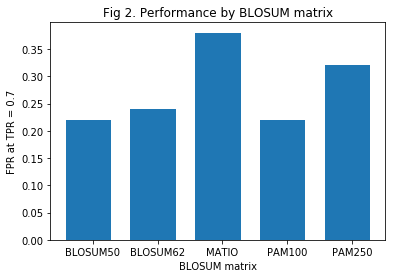

In [6]:
width = 0.7
x = [1,2,3,4,5]
fig, ax = plt.subplots()
bargraph = ax.bar(x,all_FPRs,width)

ax.set_xticks(np.add(x,(width/10)))
ax.set_xticklabels(blosum_files)
plt.ylabel('FPR at TPR = 0.7')
plt.xlabel('BLOSUM matrix')
plt.title('Fig 2. Performance by BLOSUM matrix')
plt.show()

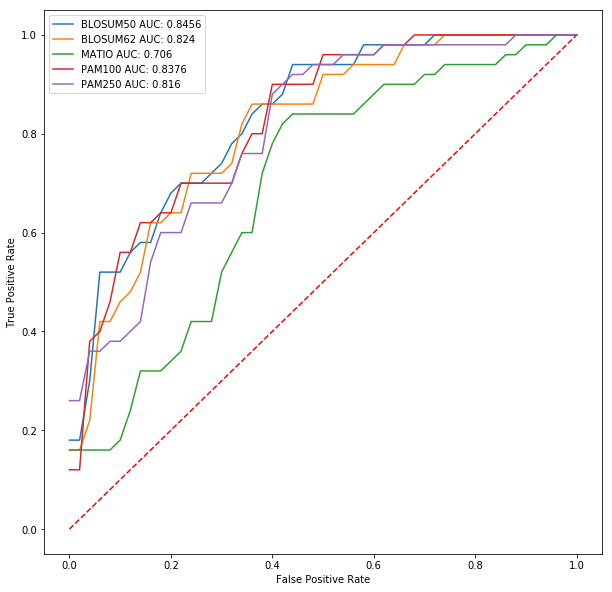

In [8]:
visualize.plot_ROCs(true_pos, true_neg, scores_array,blosum_files)
plt.title('Fig 3. ROC curves by BLOSUM matrix')

### In Figure 2 (above), I evaluated which BLOSUM matrix gave the best performance given the parameters:
    ## gap opening penalty = -6, gap extension penalty = -5
### BLOSUM50 performed the best. The AUC = 0.8456 .
### PAM100 came in second best. AUC = 0.8376.

### MATIO performed the worst ; AUC = 0.706. However it still performed better than a random sampling (red dotted line)

### Because the ROC curve with the maximum AUC is the best, I would opt for BLOSUM 50 for this dataset, and these gap parameters. 

### Note that because the gap parameters were optimized using the BLOSUM50 matrix, this may have influenced the results.


## Question 1.3

### In question three I will evaluate the effect of normalizing the alignment scores by the length of the shortest sequence in the pair. I will then compare the effects pre and post normalization for the best BLOSUM matrix.


In [9]:
#########calculate
scores_array = []
######
for scoring_matrix in blosums:
    score = []
    for file in all_pairs:
        for pair in file:
            ###this contains just the scores
            output = smith_waterman.smith_waterman(pair[0],pair[1],scoring_matrix,pen_gap_open,pen_gap_extend)
            ###normalize by minimum length of sequence
            norm_factor = min(len(pair[0]),len(pair[1]))
            ###
            alignment_score = float(output[2])/float(norm_factor)
            score.append([alignment_score,pair])
    scores_array.append(score)

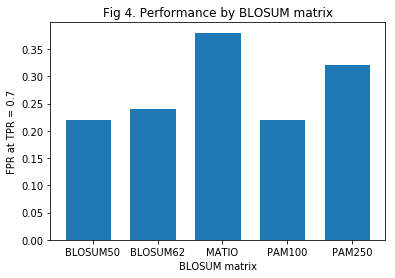

In [13]:
width = 0.7
x = [1,2,3,4,5]
fig, ax = plt.subplots()
bargraph = ax.bar(x,all_FPRs,width)

ax.set_xticks(np.add(x,(width/10)))
ax.set_xticklabels(blosum_files)
plt.ylabel('FPR at TPR = 0.7')
plt.xlabel('BLOSUM matrix')
plt.title('Fig 4. Performance by BLOSUM matrix')
plt.show()

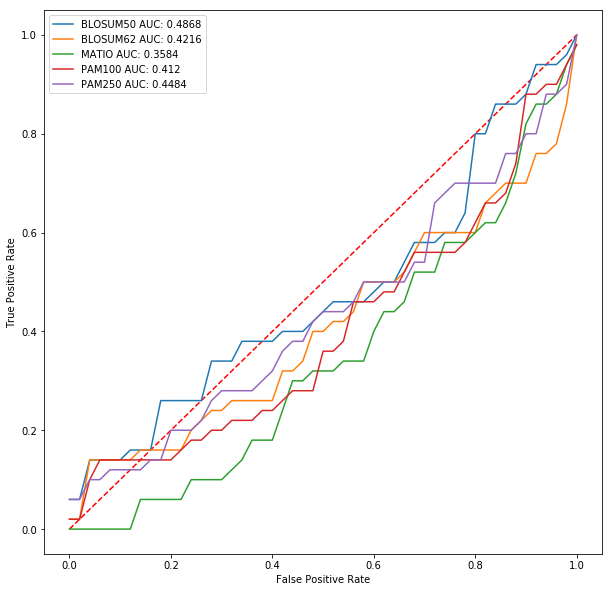

In [11]:
visualize.plot_ROCs(true_pos, true_neg, scores_array,blosum_files)
plt.title('Fig 5. ROC curves by BLOSUM matrix')

### In Figure 3 (above), I evaluated which BLOSUM matrix gave the best performance given the parameters:
    ## gap opening penalty = -6, gap extension penalty = -5
### and
    ## minimum length normalization of the alignment scores
### I found that compared to the ROC curves from non-normalized scores, the results were significantly worse with normalization.

### I believe the results were worse with minimum length normalization because the length is an important contributor to whether or not two sequences are aligned. Removing this important factor in the scoring system diminishes the power of the algorithm, as demonstrated by the fact that the ROC curves are below X = Y (random classification). 

### For example, if you have two sequences that are very long (>1000 bps each), and they have a very high alignment score, then you would conclude that they are well aligned. Perhaps ninety percent of the bases are aligned well. If you then normalized this you would divide by the length, and essentially be calculating the per base alignment score. 

### However because in the smith-waterman algorithm you already account for mismatches, gap opening and extensions, you are accounting for length biases already. Just because a pair of sequences is long does not mean they will necessarily have high alignment scores; because of the introduction of these gap penalties, high length sequences with long stretches of non-pairing will have low alignment scores.

### Therefore, given these considerations it is logical that a minimum length based normalization diminishes the power of the algorithm and is worse than unnormalized smith-waterman.


### Because BLOSUM50 was the best, let's see the ROC curves before and after normalization.

In [14]:
#####import unique blosum matrices
blosums = []
blosum_files = ['BLOSUM50']
for file in blosum_files:
    importme = 'blosums/'+file
    blosums.append(io.import_blosum(importme))    
#########calculate without normalization
scores_array = []
######
for scoring_matrix in blosums:
    score = []
    for file in all_pairs:
        for pair in file:
            ###this contains just the scores
            output = smith_waterman.smith_waterman(pair[0],pair[1],scoring_matrix,pen_gap_open,pen_gap_extend)
            score.append([output[2],pair])
    scores_array.append(score)   
#########calculate with normalization
######
for scoring_matrix in blosums:
    score = []
    for file in all_pairs:
        for pair in file:
            ###this contains just the scores
            output = smith_waterman.smith_waterman(pair[0],pair[1],scoring_matrix,pen_gap_open,pen_gap_extend)
            ###normalize by minimum length of sequence
            norm_factor = min(len(pair[0]),len(pair[1]))
            ###
            alignment_score = float(output[2])/float(norm_factor)
            score.append([alignment_score,pair])
    scores_array.append(score)
    

Fig 6. ROC curves by BLOSUM matrix


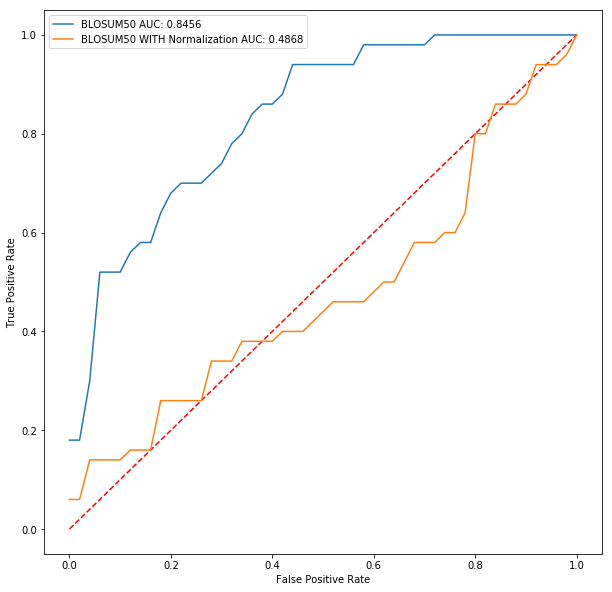

In [26]:
####
legends = ['BLOSUM50','BLOSUM50 WITH Normalization']
####
print('Fig 6. ROC curves by BLOSUM matrix')
visualize.plot_ROCs(true_pos, true_neg, scores_array,legends)
plt.show()

### Clearly, BLOSUM50 without normalization performs much better than BLOSUM50 with normalization.